## 导入模块

In [1]:
import os
os.getcwd()

'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master'

In [2]:
from Utils.Models import *
from Utils.My_Utils_Magnetic_methods import *

## 单个物体及标注可视化

### 球体

[-4.925  3.05   4.7    4.05 ]


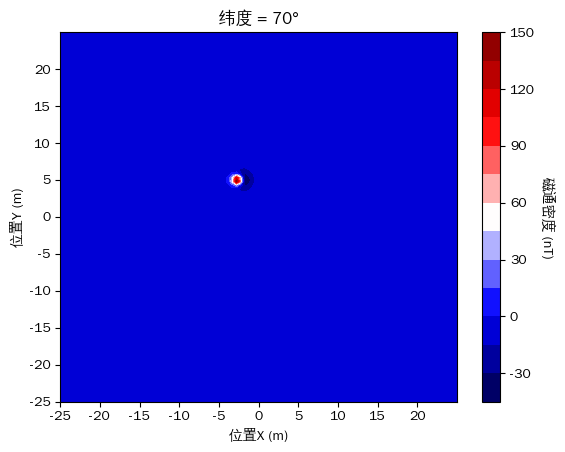

In [3]:
test_diple = Dipole(x=5,y=-2.5,r=0.18,h=1,Latitudes=70)
bbox = test_diple.bbox
print(bbox)
test_diple.Plot_X_array_raw()


### 椭球

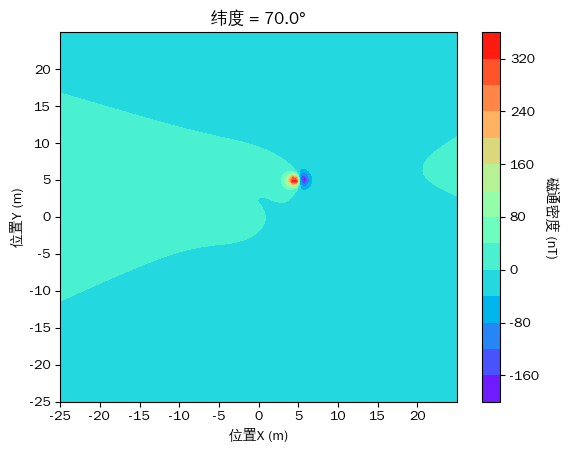

In [4]:
test_elli = Ellipse(x=5,y=5,a=0.4,z=1,gama=90,theta=0,phi=-5)
test_elli2 = Ellipse(a=0.15)
test_elli.F = test_elli.F +test_elli2.F
test_elli.Plot_X_array_raw()

In [5]:
print(f'球体异常极值{np.max(test_diple.F)},{np.min(test_diple.F)}')
print(f'椭球异常极值{np.max(test_elli.F)},{np.min(test_elli.F)}')

球体异常极值140.14812729739654,-36.577130287151526
椭球异常极值337.0143041002925,-176.00099014107602


### 圆柱体

## 最多9个物体同图及标注生成

### 全为球体

In [6]:
data_num = 4096
noise_num = 500

In [22]:
parameter, num_of_dipoles, bbox,data = generate_random_muti_dipole(data_num=data_num)

In [23]:
data= X_array(data)
map_lenght = 25
zmax = 416
X = np.linspace(-map_lenght, map_lenght, zmax)
Y = np.linspace(-map_lenght, map_lenght, zmax)

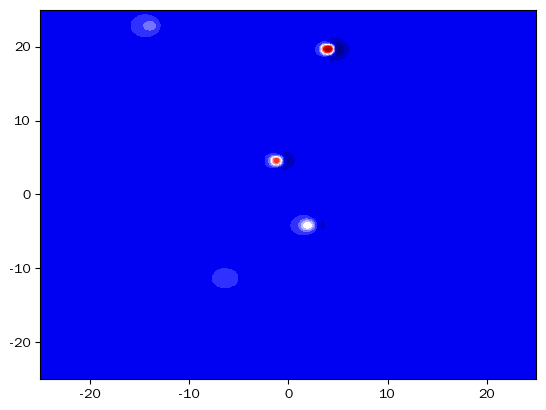

In [9]:
plt.contourf(X,Y,data[2], levels=16, cmap='seismic')
plt.show()

Dipole_0: x0: -21.8, y0: 9.5, w: 4.7, h:4.0
Dipole_1: x0: 1.0, y0: -13.0, w: 4.7, h:4.1
Dipole_2: x0: 18.2, y0: -21.0, w: 4.7, h:4.1
Dipole_3: x0: 13.4, y0: 14.2, w: 4.7, h:4.1
Dipole_4: x0: 4.2, y0: -25.0, w: 4.7, h:3.3
Dipole_5: x0: 4.2, y0: -5.0, w: 4.7, h:4.0
Dipole_6: x0: 21.4, y0: -0.6, w: 3.6, h:4.0
Dipole_0: x0: 15.4, y0: 2.6, w: 4.7, h:4.0
Dipole_1: x0: 3.8, y0: 20.7, w: 4.7, h:4.1


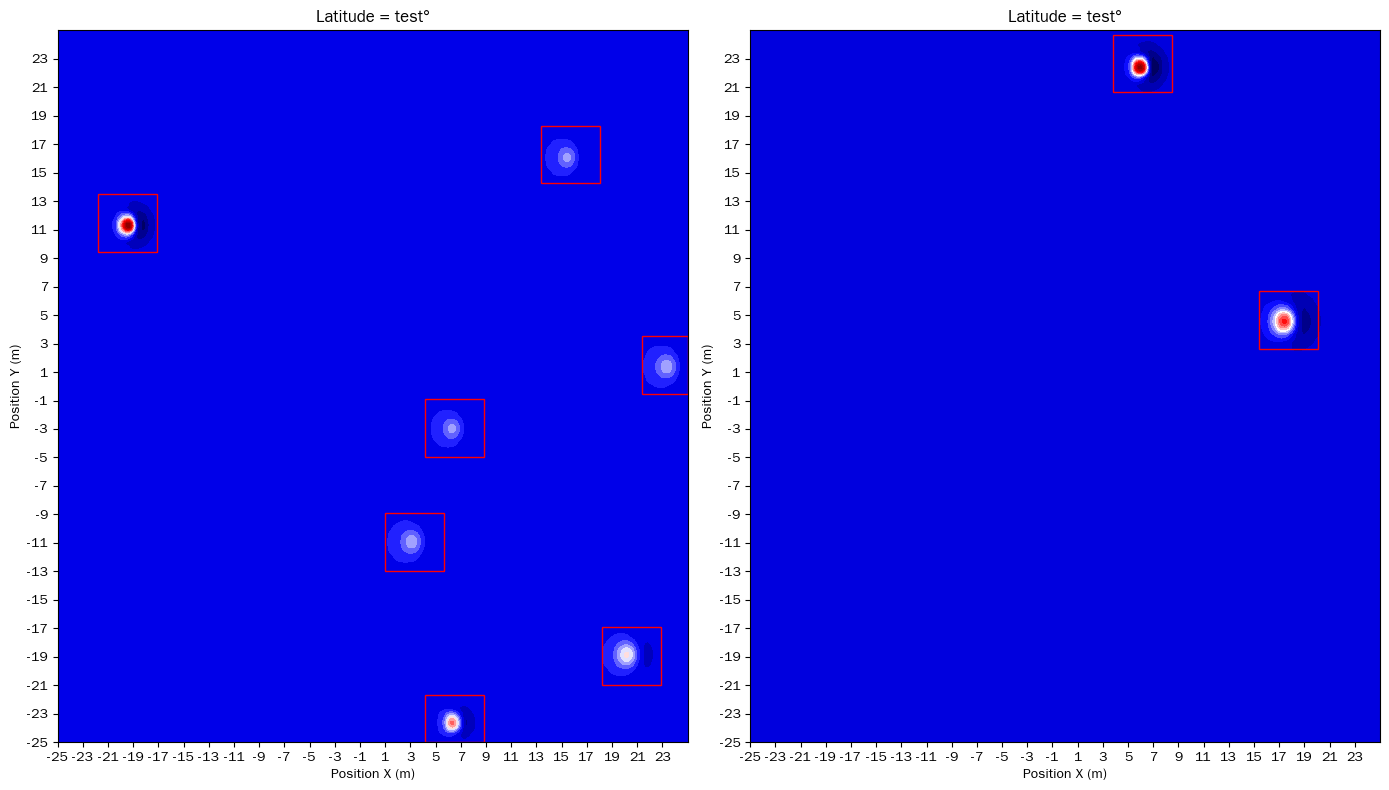

In [10]:
Plot_X_data(num_of_dipoles, bbox, data)

In [11]:
gass_id = add_gaussian_noise(data,n_models_with_noise=noise_num)

Dipole_0: x0: -9.0, y0: 11.5, w: 4.7, h:4.0
Dipole_1: x0: -17.4, y0: -25.0, w: 4.7, h:2.9
Dipole_2: x0: -1.0, y0: -13.0, w: 4.7, h:4.1
Dipole_3: x0: 15.0, y0: 2.2, w: 4.7, h:4.0
Dipole_4: x0: -10.6, y0: -9.8, w: 4.7, h:4.0
Dipole_0: x0: -13.8, y0: -25.0, w: 4.7, h:2.5
Dipole_1: x0: 15.0, y0: 19.4, w: 4.7, h:4.1


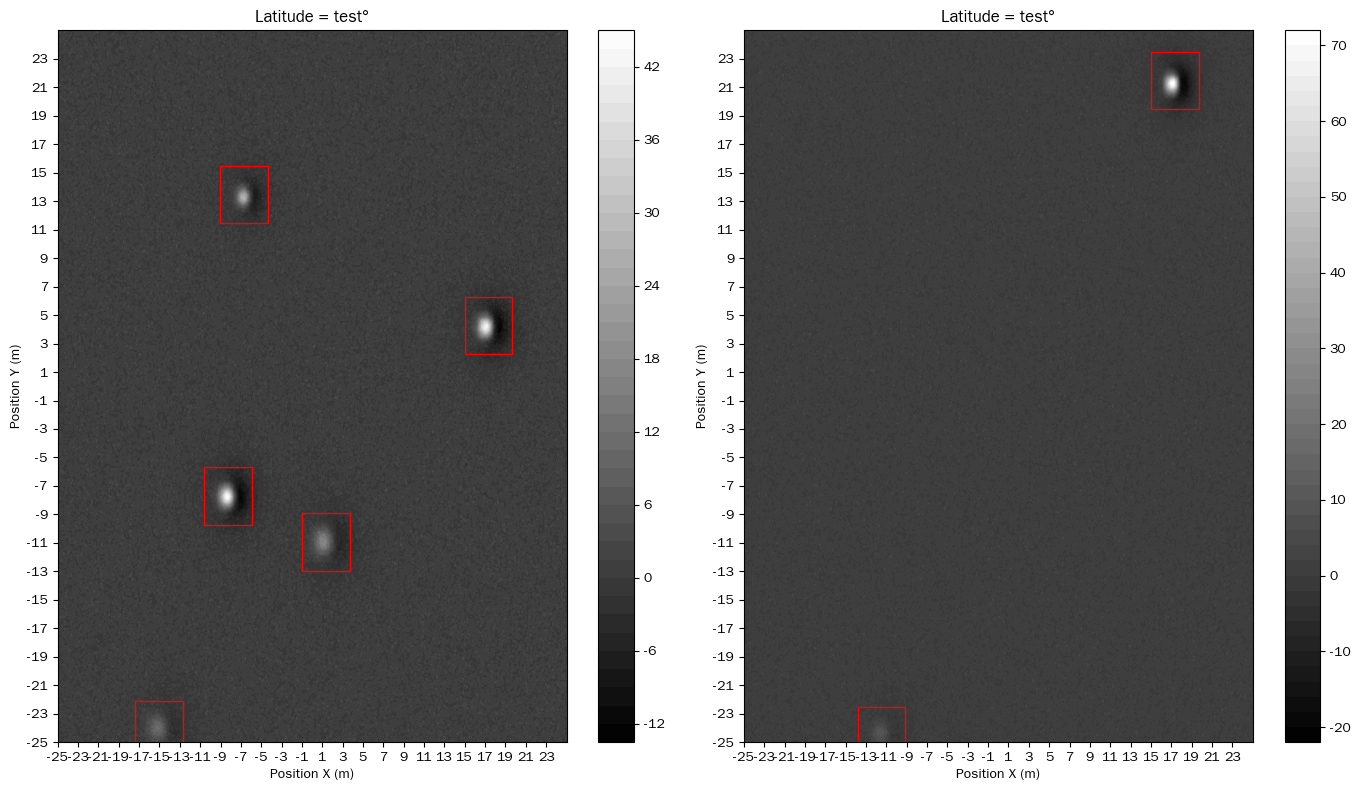

In [12]:
Plot_X_data_with_noise(num_of_dipoles, bbox, data,gass_id)

In [24]:
data2 = data


In [25]:
bbox2 = bbox

In [26]:
def convert_to_YOLO(
        num_of_dipoles, bbox, X_data_array, root_dir=None, map_length=25):
    num_of_datas = X_data_array.shape[0]
    X_array_data = X_data_array.reshape(
        X_data_array.shape[0], X_data_array.shape[1], X_data_array.shape[2], 1)
    length = int(map_length*2)
    bbox[:, :, 0] = bbox[:, :, 0]+bbox[:, :, 2]/2 + map_length
    bbox[:, :, 1] = bbox[:, :, 1]+bbox[:, :, 3]/2 + map_length

    YOLO_box = bbox/length
    if root_dir is None:
        root_dir = '/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/YOLOv8'  # type: ignore
    n1 = int(num_of_datas*0.7)
    n2 = int(num_of_datas*0.95)
    for bb_n_models in range(num_of_datas):
        if bb_n_models < n1:
            flag = "train"
            dir_name = f'{root_dir}/{flag}'
            os.chdir(dir_name)
        elif bb_n_models < n2:
            flag = "val"
            dir_name = f'{root_dir}/{flag}'
            os.chdir(dir_name)
        else:
            flag = "test"
            dir_name = f'{root_dir}/{flag}'
            os.chdir(dir_name)
        # Normalize between 0 - 1

        image = (X_array_data[bb_n_models, :, :, :] - np.min(X_array_data[bb_n_models, :, :, :])) / (
            np.max(X_array_data[bb_n_models, :, :, :]) - np.min(X_array_data[bb_n_models, :, :, :]))

        # Converting to rgb

        image_t = np.uint8(image * 255)
        image_t = cv2.cvtColor(image_t, cv2.COLOR_GRAY2RGB)  # type: ignore

        # Saving image

        im = Image.fromarray(image_t)
        im.convert('RGB').save(f"{flag}_{bb_n_models+1}.jpg")

        for bb_n_dipoles in range(num_of_dipoles[bb_n_models]):

            if bb_n_dipoles == 0:

                with open(f"{flag}_{bb_n_models+1}.txt", "w") as f:

                    f.write('0' + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 0]) + ' ' + str(
                        YOLO_box[bb_n_models, bb_n_dipoles, 1]) + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 2]) + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 3]))

            else:
                with open(f"{flag}_{bb_n_models+1}.txt", "a") as f:
                    f.write('\n' + '0' + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 0]) + ' ' + str(
                        YOLO_box[bb_n_models, bb_n_dipoles, 1]) + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 2]) + ' ' + str(YOLO_box[bb_n_models, bb_n_dipoles, 3]))


In [27]:
root_dir = "/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/YOLOv8/my_Model_training/data/qiu_data"
convert_to_YOLO(num_of_dipoles, bbox2, X_data_array=data2, map_length=25,root_dir=root_dir)

## 保存数据